In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [3]:
data = pd.read_csv("weatherAUS.csv")
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

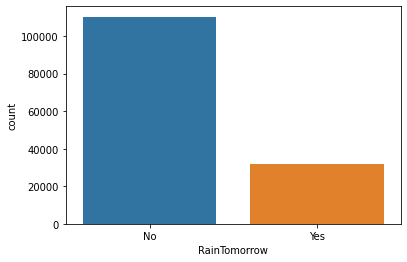

In [11]:
sns.countplot(x= "RainTomorrow",data=data)

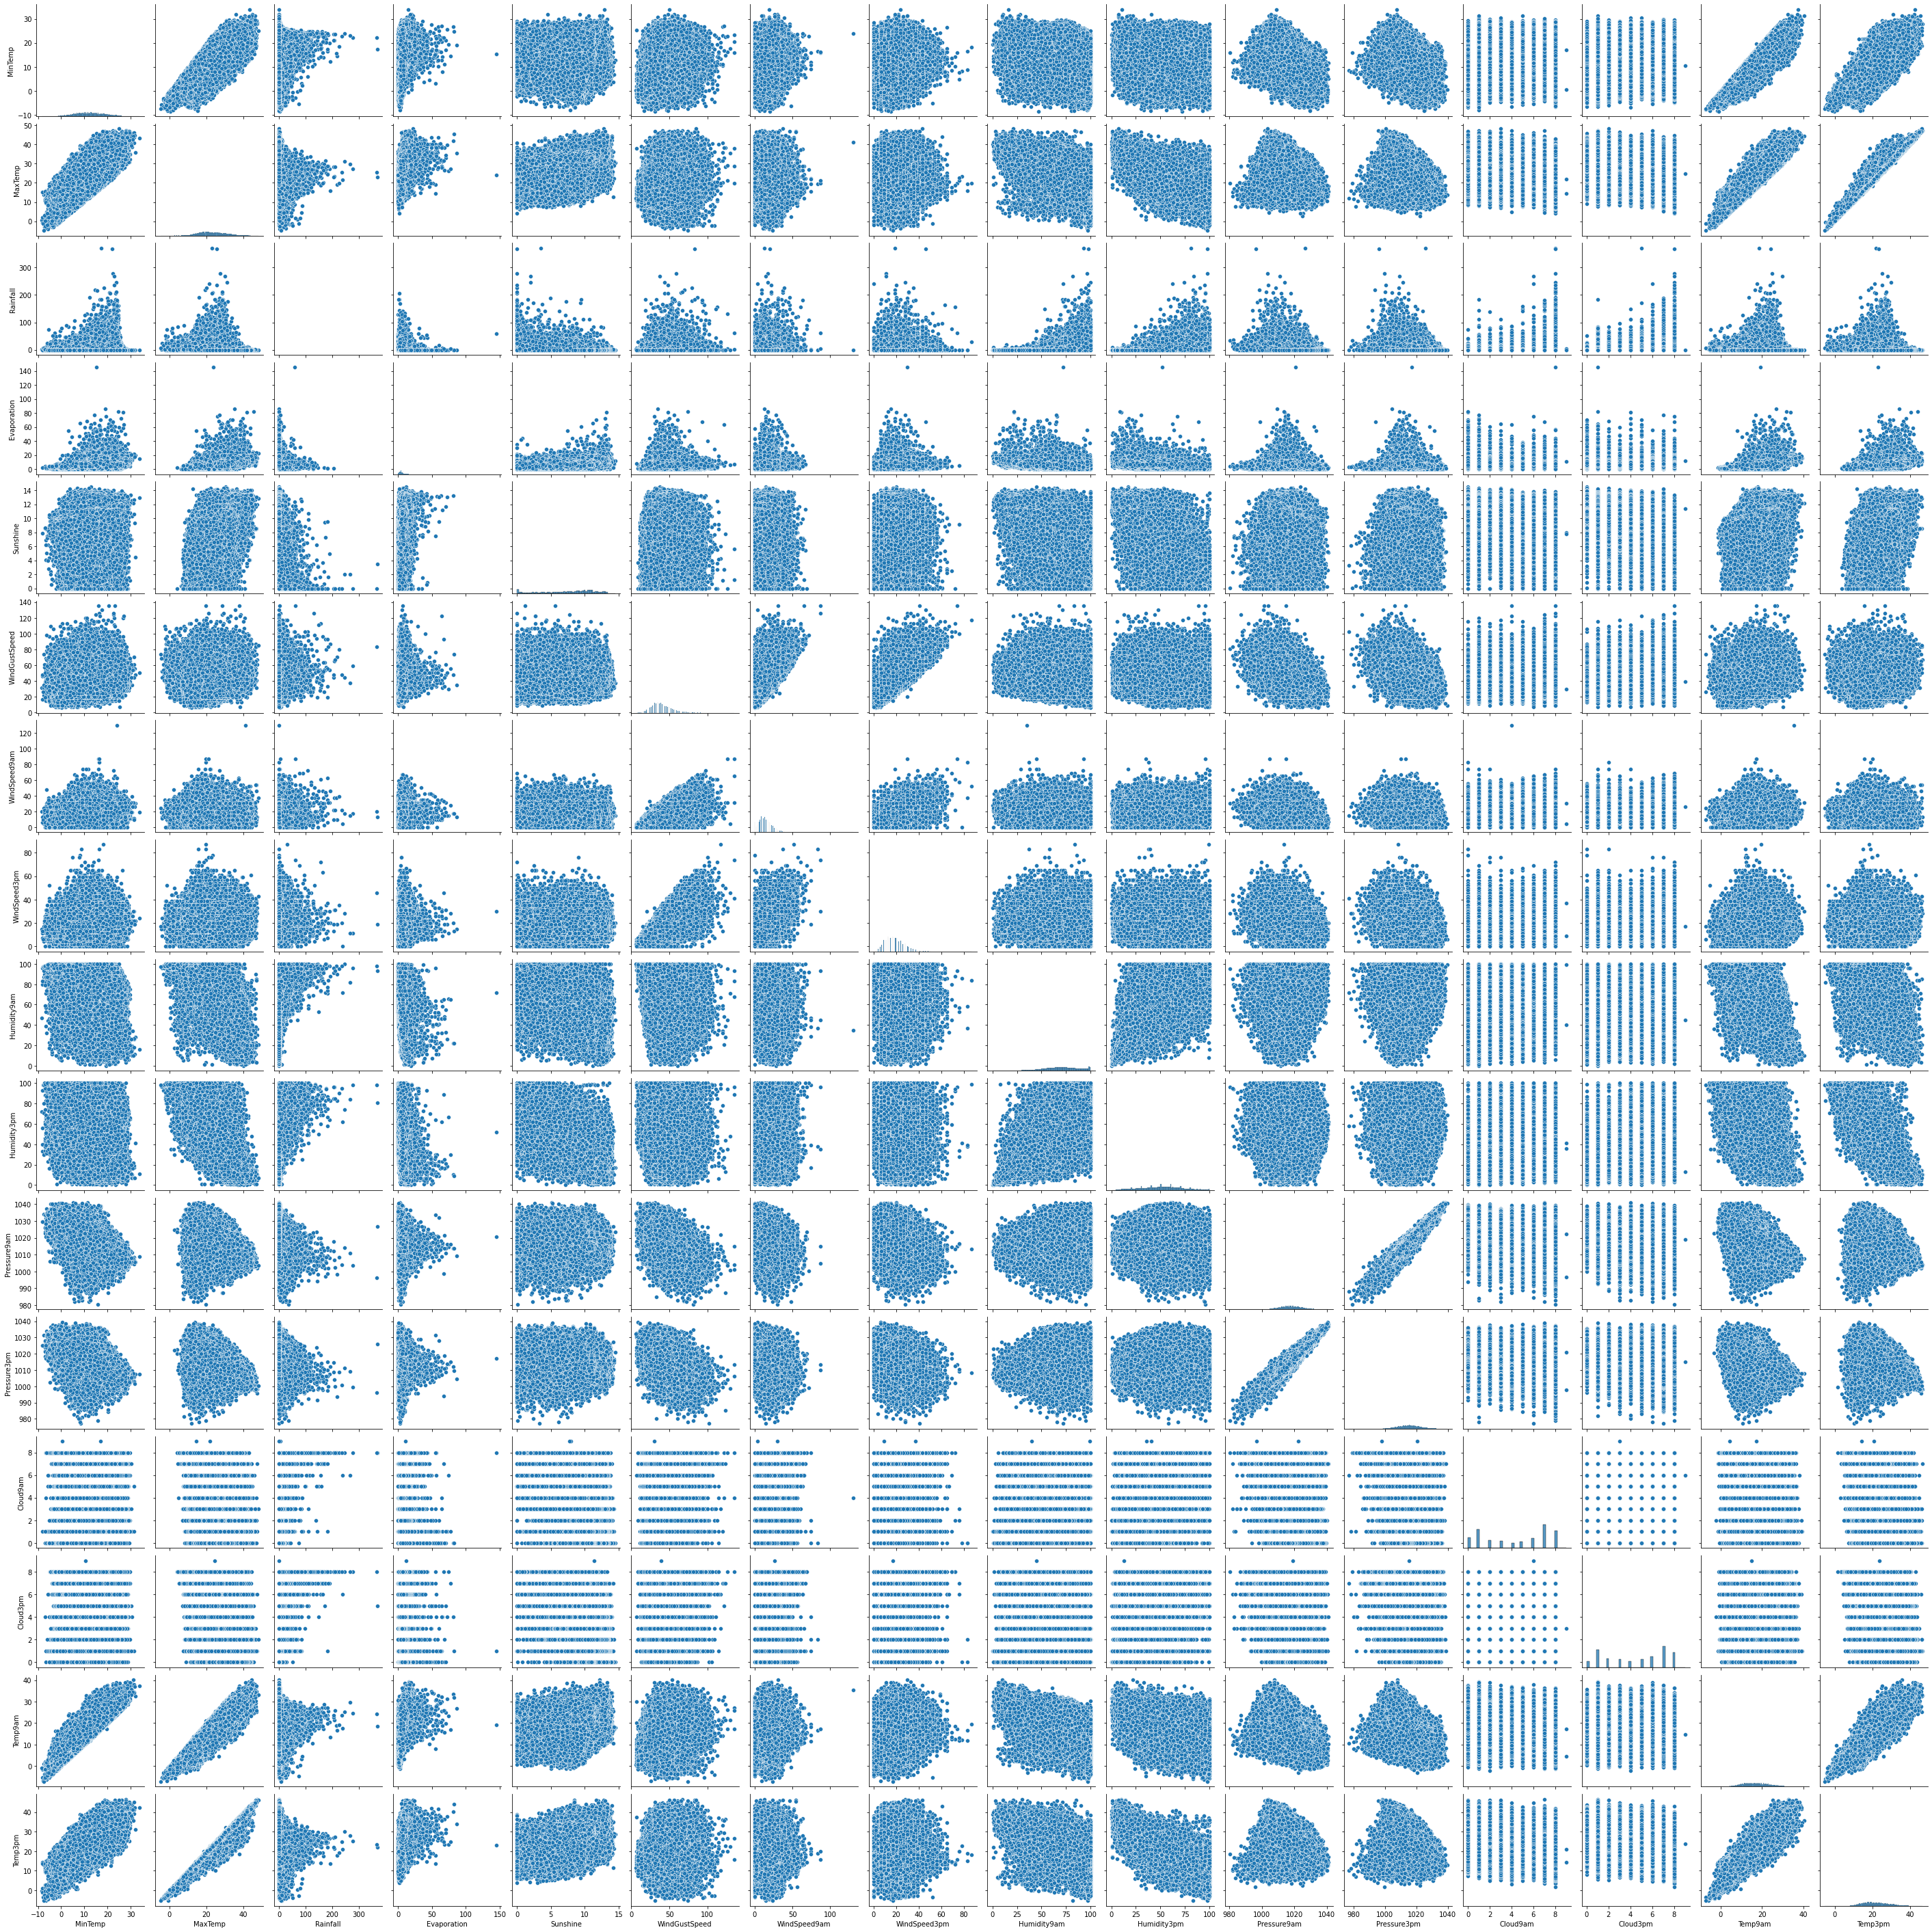

In [12]:
sns.pairplot(data)

<AxesSubplot:>

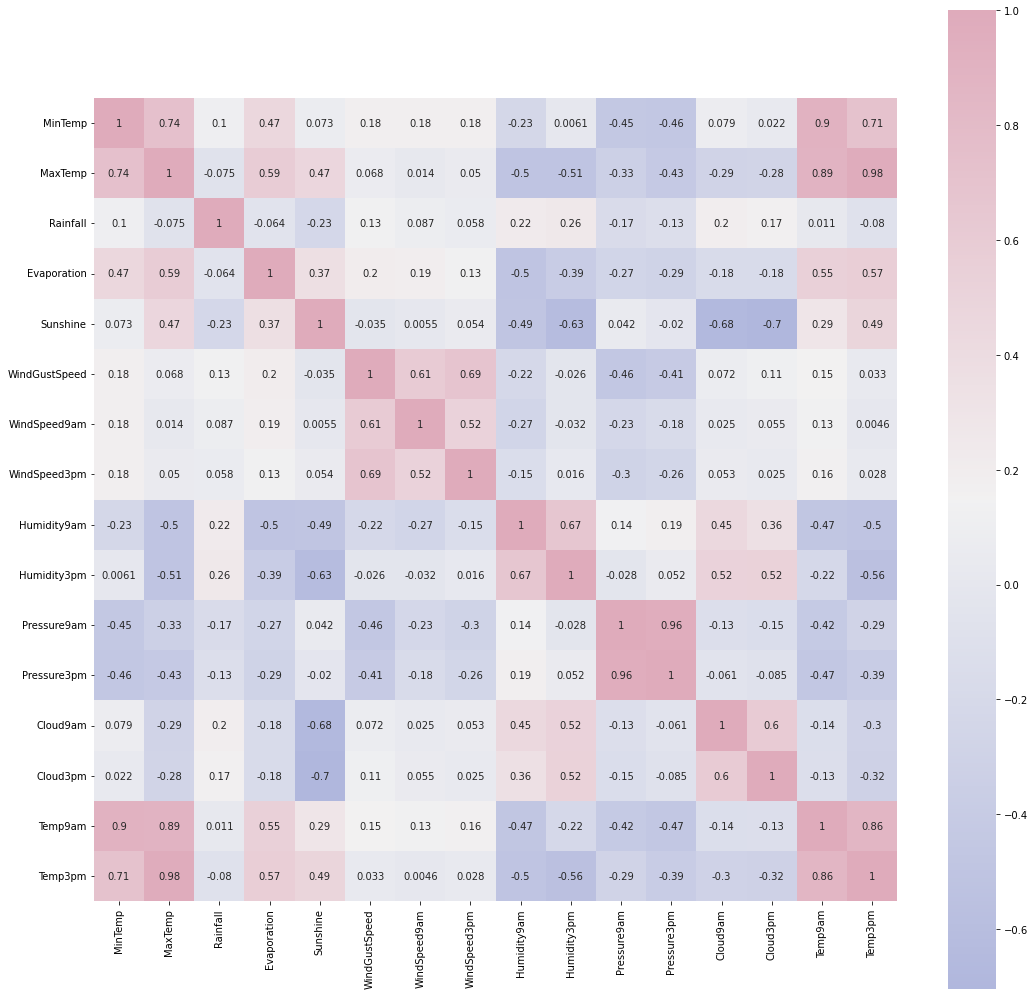

In [14]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [16]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Temp3pm  RainToday  RainTomorrow  \
0           W           44.0          W  ...    21.8         No            No   
1         WNW           44.0        NNW  ...    24.3         No            No   
2         WSW           46.0          W  ...    23.2         No            No   
3          NE           24.0         SE  ...    26.5         No            No   
4           W           41.0        ENE  ...    29.7         No            No   

   year  month     month_sin  month_cos  day   day_sin   day_cos  
0  2008     12 -2.449294e-16        1.0    1  0.201299  0.979530  
1  2008     12 -2.449294e-16        1.0    2  0.394356  0.918958  
2  2008     12 -2.449294e-16        1.0    3  0.571268  0.820763  
3  2008     12 -2.449294e-16        1.0    4  0.724793  0.688967  
4  2008     12 -2.449294e-16        1.0    5  0.848644  0.528964  

[5 rows x 30 columns]

Text(0.5, 0, 'Days In Year')

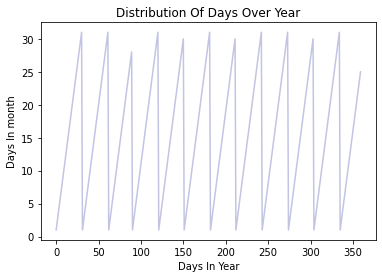

In [17]:
# roughly a year's span section 
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

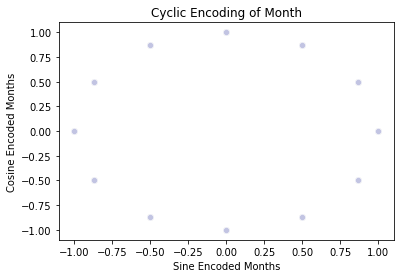

In [18]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

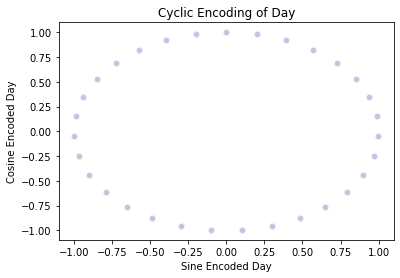

In [19]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [20]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [21]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [22]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [23]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [24]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [25]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [27]:
t = (data.dtypes == "object")
cate_cols = list(t[t].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [36]:
data[cate_cols].describe()

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count     145460      145460     145460     145460    145460       145460
unique        49          16         16         16         2            2
top     Canberra           W          N         SE        No           No
freq        3436       20241      22324      15066    113580       113583

In [37]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [41]:
data.tail(20)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145440 2017-06-06        41      1.2     20.8       0.0          4.8   
145441 2017-06-07        41      0.5     21.7       0.0          4.8   
145442 2017-06-08        41      4.0     20.0       0.0          4.8   
145443 2017-06-09        41      3.4     19.8       0.0          4.8   
145444 2017-06-10        41      3.2     18.6       0.0          4.8   
145445 2017-06-11        41      2.4     19.1       0.0          4.8   
145446 2017-06-12        41      5.1     19.7       0.0          4.8   
145447 2017-06-13        41      2.5     21.2       0.0          4.8   
145448 2017-06-14        41      2.3     21.4       0.0          4.8   
145449 2017-06-15        41      2.6     22.5       0.0          4.8   
145450 2017-06-16        41      5.2     24.3       0.0          4.8   
145451 2017-06-17        41      6.4     23.4       0.0          4.8   
145452 2017-06-18        41      8.0     20.7       0.0          4.8   
145453 2017-06-19        41      7.4     20.6       0.0          4.8   
145454 2017-06-20        41      3.5     21.8       0.0          4.8   
145455 2017-06-21        41      2.8     23.4       0.0          4.8   
145456 2017-06-22        41      3.6     25.3       0.0          4.8   
145457 2017-06-23        41      5.4     26.9       0.0          4.8   
145458 2017-06-24        41      7.8     27.0       0.0          4.8   
145459 2017-06-25        41     14.9     22.6       0.0          4.8   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  Temp3pm  \
145440       8.4            0           43.0           2  ...     19.9   
145441       8.4            0           43.0           2  ...     20.5   
145442       8.4            9           39.0           2  ...     19.0   
145443       8.4            0           43.0           2  ...     18.9   
145444       8.4            0           46.0           2  ...     17.4   
145445       8.4            0           33.0           9  ...     18.8   
145446       8.4            0           46.0           2  ...     19.2   
145447       8.4            1           35.0           2  ...     20.3   
145448       8.4            9           22.0           9  ...     20.3   
145449       8.4            8           19.0           8  ...     22.1   
145450       8.4            0           24.0           9  ...     23.3   
145451       8.4            2           31.0           8  ...     23.1   
145452       8.4            2           41.0           9  ...     20.0   
145453       8.4            0           35.0           2  ...     20.3   
145454       8.4            0           31.0           2  ...     20.9   
145455       8.4            0           31.0           9  ...     22.4   
145456       8.4            6           22.0           9  ...     24.5   
145457       8.4            3           37.0           9  ...     26.1   
145458       8.4            9           28.0          10  ...     26.0   
145459       8.4           13           39.0           2  ...     20.9   

        RainToday  RainTomorrow  year  month     month_sin  month_cos  day  \
145440          0             0  2017      6  1.224647e-16       -1.0    6   
145441          0             0  2017      6  1.224647e-16       -1.0    7   
145442          0             0  2017      6  1.224647e-16       -1.0    8   
145443          0             0  2017      6  1.224647e-16       -1.0    9   
145444          0             0  2017      6  1.224647e-16       -1.0   10   
145445          0             0  2017      6  1.224647e-16       -1.0   11   
145446          0             0  2017      6  1.224647e-16       -1.0   12   
145447          0             0  2017      6  1.224647e-16       -1.0   13   
145448          0             0  2017      6  1.224647e-16       -1.0   14   
145449          0             0  2017      6  1.224647e-16       -1.0   15   
145450          0             0  2017      6  1.224647e-16       -1.0   16   
145451   

In [42]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

count          mean       std       min       25%       50%  \
Location       145460.0  7.815677e-18  1.000003 -1.672228 -0.899139  0.014511   
MinTemp        145460.0 -4.501830e-16  1.000003 -3.250525 -0.705659 -0.030170   
MaxTemp        145460.0  3.001220e-16  1.000003 -3.952405 -0.735852 -0.086898   
Rainfall       145460.0  7.815677e-18  1.000003 -0.275097 -0.275097 -0.275097   
Evaporation    145460.0 -3.282584e-17  1.000003 -1.629472 -0.371139 -0.119472   
Sunshine       145460.0 -5.424080e-16  1.000003 -2.897217  0.076188  0.148710   
WindGustDir    145460.0  6.252542e-18  1.000003 -1.724209 -0.872075  0.193094   
WindGustSpeed  145460.0  1.824961e-16  1.000003 -2.588407 -0.683048 -0.073333   
WindDir9am     145460.0  7.190423e-17  1.000003 -1.550000 -0.885669  0.000105   
WindDir3pm     145460.0  8.284618e-17  1.000003 -1.718521 -0.837098  0.044324   
WindSpeed9am   145460.0  5.627287e-17  1.000003 -1.583291 -0.793380 -0.116314   
WindSpeed3pm   145460.0  6.565169e-17  1.000003 -2.141841 -0.650449  0.037886   
Humidity9am    145460.0  2.250915e-16  1.000003 -3.654212 -0.631189  0.058273   
Humidity3pm    145460.0 -8.440931e-17  1.000003 -2.518329 -0.710918  0.021816   
Pressure9am    145460.0 -4.314254e-16  1.000003 -5.520544 -0.616005 -0.006653   
Pressure3pm    145460.0  5.027043e-15  1.000003 -5.724832 -0.622769 -0.007520   
Cloud9am       145460.0 -1.016038e-16  1.000003 -2.042425 -0.727490  0.149133   
Cloud3pm       145460.0  7.346736e-17  1.000003 -2.235619 -0.336969  0.137693   
Temp9am        145460.0  7.503050e-17  1.000003 -3.750358 -0.726764 -0.044517   
Temp3pm        145460.0 -6.877796e-17  1.000003 -3.951301 -0.725322 -0.083046   
RainToday      145460.0 -8.988029e-18  1.000003 -0.529795 -0.529795 -0.529795   
year           145460.0  2.080221e-14  1.000003 -2.273637 -0.697391  0.090732   
month_sin      145460.0  5.861758e-19  1.000003 -1.434333 -0.725379 -0.016425   
month_cos      145460.0 -2.745257e-17  1.000003 -1.388032 -1.198979  0.023080   
day_sin        145460.0  1.075877e-17  1.000003 -1.403140 -1.019170 -0.003198   
day_cos        145460.0 -1.353700e-17  1.000003 -1.392587 -1.055520 -0.044639   

                    75%        max  
Location       0.857881   1.701250  
MinTemp        0.723865   3.410112  
MaxTemp        0.703133   3.510563  
Rainfall      -0.203581  43.945571  
Evaporation    0.006361  43.985108  
Sunshine       0.257494   2.360634  
WindGustDir    1.045228   1.471296  
WindGustSpeed  0.460168   7.243246  
WindDir9am     0.885879   1.771653  
WindDir3pm     0.925747   1.586813  
WindSpeed9am   0.560752  13.086472  
WindSpeed3pm   0.611499   7.839016  
Humidity9am    0.747734   1.649338  
Humidity3pm    0.656852   2.366565  
Pressure9am    0.617561   3.471111  
Pressure3pm    0.622735   3.653960  
Cloud9am       0.587445   1.902380  
Cloud3pm       0.612356   2.036343  
Temp9am        0.699753   3.599302  
Temp3pm        0.661411   3.653834  
RainToday     -0.529795   1.887521  
year           0.878855   1.666978  
month_sin      0.692529   1.401483  
month_cos      0.728636   1.434192  
day_sin        1.012774   1.396744  
day_cos        1.011221   1.455246

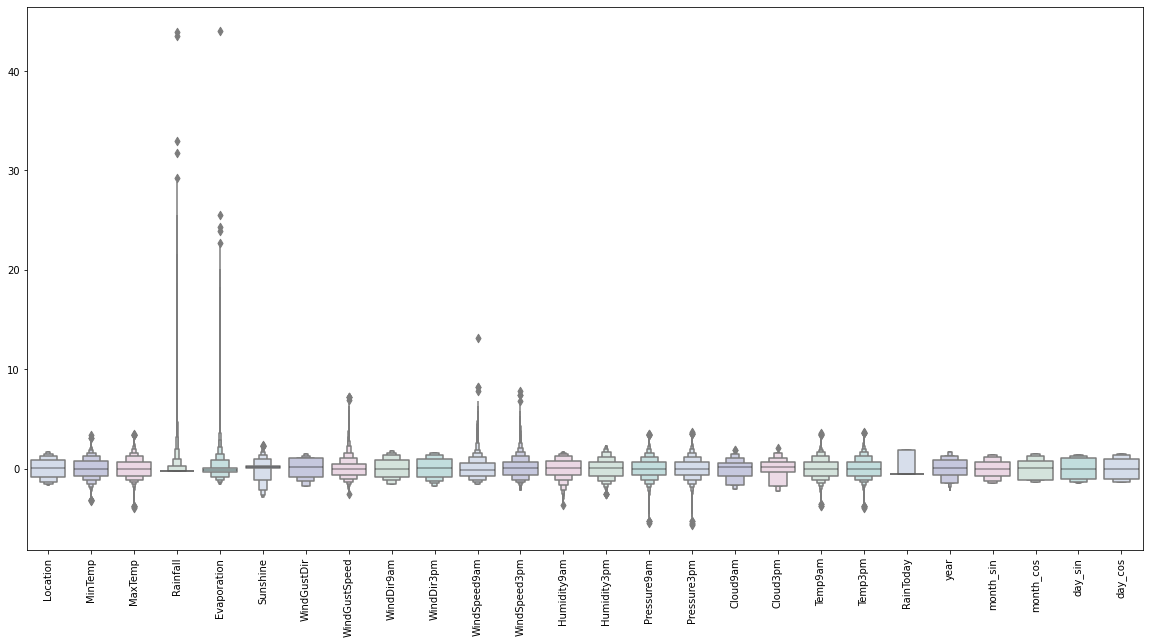

In [43]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [44]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

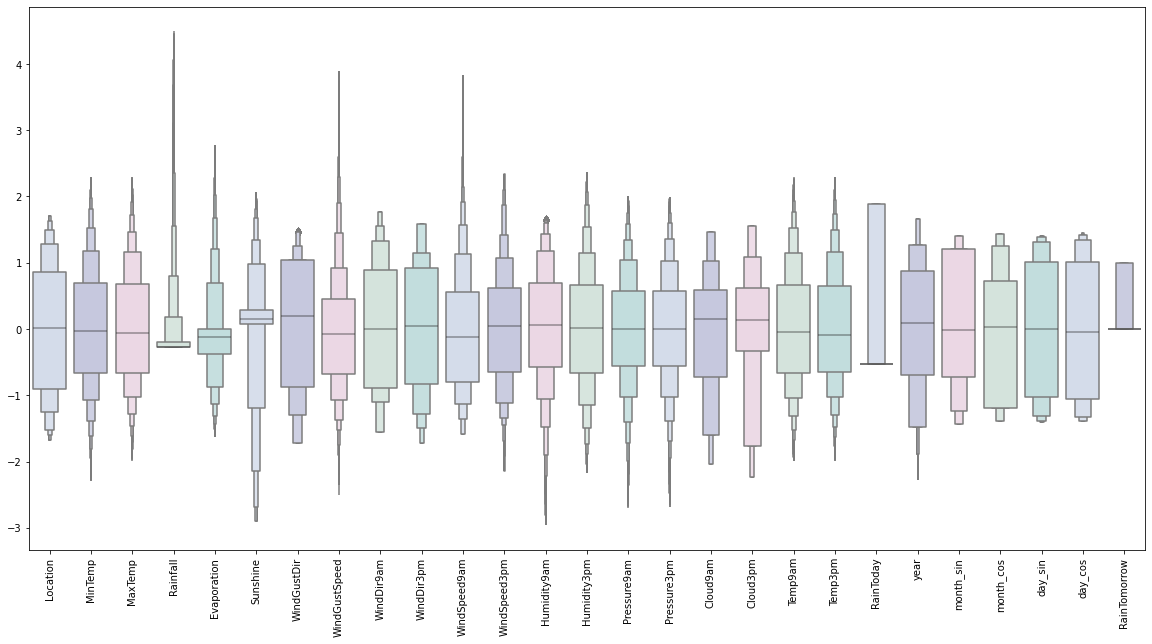

In [45]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [46]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

In [47]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 3s 912us/step - loss: 0.4782 - accuracy: 0.7840 - val_loss: 0.3937 - val_accuracy: 0.7860
Epoch 2/150
2551/2551 [==============================] - 2s 870us/step - loss: 0.4144 - accuracy: 0.7997 - val_loss: 0.3840 - val_accuracy: 0.8356
Epoch 3/150
2551/2551 [==============================] - 2s 880us/step - loss: 0.4061 - accuracy: 0.8261 - val_loss: 0.3767 - val_accuracy: 0.8381
Epoch 4/150
2551/2551 [==============================] - 2s 874us/step - loss: 0.3999 - accuracy: 0.8264 - val_loss: 0.3724 - val_accuracy: 0.8400
Epoch 5/150
2551/2551 [==============================] - 2s 858us/step - loss: 0.3976 - accuracy: 0.8291 - val_loss: 0.3691 - val_accuracy: 0.8418
Epoch 6/150
2551/2551 [==============================] - 2s 856us/step - loss: 0.3947 - accuracy: 0.8308 - val_loss: 0.3670 - val_accuracy: 0.8424
Epoch 7/150
2551/2551 [==============================] - 2s 870us/step - loss: 0.3924 - accuracy: 0.8306 - val_loss: 0

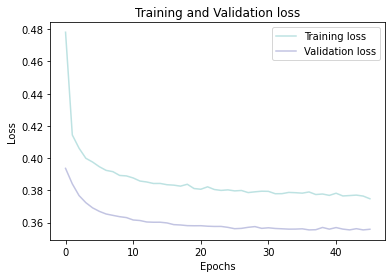

In [48]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

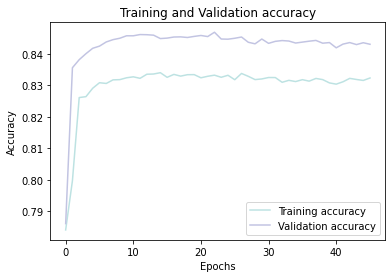

In [49]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

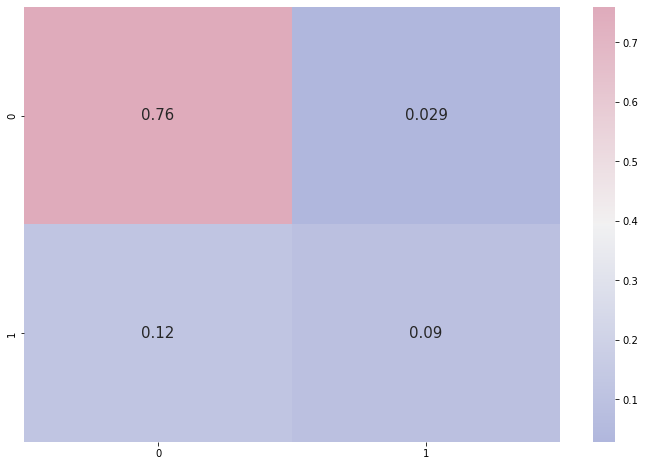

In [51]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20110
           1       0.76      0.42      0.54      5398

    accuracy                           0.85     25508
   macro avg       0.81      0.69      0.73     25508
weighted avg       0.84      0.85      0.83     25508



In [53]:
model.save("rainpredictor.h5")
print("Saved model to disk")

Saved model to disk
